## Final Project Job Connector Data Science and Machine Learning (JCDS0804 JKT)
**By: Azizur Rachman**

## Description
The following description is given directly from this link https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study

"Problem Statement
A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study
You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## A. Preprocessing and Data Cleaning

In [2]:
gen_data = pd.read_csv('A:\Purwadhika\Jupyter\Final Project\Dataset\general_data.csv')
gen_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [18]:
gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [27]:
gen_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [4]:
gen_data.shape #4410 rows, and 24 columns/features

(4410, 24)

In [5]:
gen_data.isna().sum() # sum of is null/NaN data in each features

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [176]:
%%time
def summary_table(df):
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes,
                                  null = df.isna().sum(),
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),
                                  unique = df.nunique(),
#                                   uniqueSample = [list(df[i].drop_duplicates().sample(2)) for i in df.columns]
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

summary_table(gen_data)
# 'uniqueSample' : [list(df[i].drop_duplicates().sample(2))for i in df.columns]}).reset_index

# pd.DataFrame({'Variables/ Columns' : df.columns, 'dataType' : df.dtypes, 
#               'null' : df.isna().sum(), 'unique' : df.nunique(), 
#               'uniqueSample' : [list(df[i].drop_duplicates().sample(1))for i in df.columns]}).reset_index(drop = True)

Wall time: 23 ms


,dataFeatures,dataType,null,null_percentage,unique,unique_percentage
0,Age,int64,0,0.00,43,0.98
1,Attrition,object,0,0.00,2,0.05
2,BusinessTravel,object,0,0.00,3,0.07
3,Department,object,0,0.00,3,0.07
4,DistanceFromHome,int64,0,0.00,29,0.66
5,Education,int64,0,0.00,5,0.11
6,EducationField,object,0,0.00,6,0.14
7,EmployeeCount,int64,0,0.00,1,0.02
8,EmployeeID,int64,0,0.00,4410,100.00
9,Gender,object,0,0.00,2,0.05


### Show the NaN values Data Frame

In [6]:
gen_data = pd.read_csv('A:\Purwadhika\Jupyter\Final Project\Dataset\general_data.csv')
null_data = gen_data[gen_data.isna().any(axis=1)]
null_data

#df[df['Car'].isna() == True].head() syntax untuk display missing value spesifik untuk column tertentu true dan display 5 query pertama saja.

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,1,24,Male,...,1.0,Y,14,8,0,NaN,4,20,11,6
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,1,116,Male,...,NaN,Y,12,8,1,5.0,2,5,0,4
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,1,138,Female,...,7.0,Y,14,8,2,NaN,3,3,1,2
210,52,No,Travel_Rarely,Sales,2,1,Medical,1,211,Male,...,NaN,Y,11,8,1,18.0,2,10,6,9
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,1,309,Male,...,4.0,Y,13,8,1,NaN,2,5,1,3
343,40,No,Travel_Frequently,Sales,9,3,Marketing,1,344,Male,...,NaN,Y,14,8,0,10.0,3,1,0,0
476,22,No,Travel_Rarely,Research & Development,8,3,Other,1,477,Male,...,NaN,Y,21,8,1,4.0,2,4,1,1
574,37,No,Travel_Rarely,Research & Development,23,3,Life Sciences,1,575,Male,...,7.0,Y,16,8,1,NaN,2,6,1,3
647,29,No,Travel_Rarely,Research & Development,3,3,Technical Degree,1,648,Female,...,NaN,Y,16,8,1,9.0,2,7,1,7
799,29,Yes,Travel_Frequently,Research & Development,28,3,Medical,1,800,Female,...,NaN,Y,17,8,3,7.0,1,5,0,0


### Step number:  6 
* Process: Read Data from Excel files named 'data_dictionary'
* Comments: The datasets contain data dictionary which is a short explanation of every features used in some of csv's files used

In [9]:
data_dict = pd.read_excel('A:\Purwadhika\Jupyter\Final Project\Dataset\data_dictionary.xlsx')
data_dict
# The datasets contain data dictionary which is a short explanation of every features used in some of csv's files used. 

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


From the above result, it can be concluded that there area 28 rows which contain at least NaN Value (19 in NumCompaniesWorked and 9 in TotalWorkingYears)

In [7]:
gen_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [29]:
gen_data.describe().transpose() #alternative .T can be used
#this is a transposed gen_data rows changed to columns and vice versa

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [179]:
emp_data = pd.read_csv('A:\Purwadhika\Jupyter\Final Project\Dataset\employee_survey_data.csv')
emp_data

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [181]:
emp_data.isna().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [183]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
EmployeeID                 4410 non-null int64
EnvironmentSatisfaction    4385 non-null float64
JobSatisfaction            4390 non-null float64
WorkLifeBalance            4372 non-null float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [180]:
mngr_data = pd.read_csv('A:\Purwadhika\Jupyter\Final Project\Dataset\manager_survey_data.csv')
mngr_data

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [182]:
mngr_data.isna().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

In [186]:
half_data = pd.merge(gen_data,emp_data, how = 'inner')
half_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,8,1,10.0,2,9,7,8,4.0,1.0,3.0


In [190]:
full_data = pd.merge(half_data,mngr_data, how = 'inner')
full_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [192]:
full_data.info()
full_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

(4410, 29)

In [193]:
full_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [194]:
full_data.columns.to_series().groupby(gen_data.dtypes).groups

{dtype('int64'): Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
        'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StandardHours',
        'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('float64'): Index(['NumCompaniesWorked', 'TotalWorkingYears'], dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18'],
       dtype='object')}

In [205]:
full_data[full_data['NumCompaniesWorked'].isna() == True]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,1,116,Male,...,5.0,2,5,0,4,4.0,2.0,3.0,3,3
210,52,No,Travel_Rarely,Sales,2,1,Medical,1,211,Male,...,18.0,2,10,6,9,4.0,1.0,3.0,3,3
343,40,No,Travel_Frequently,Sales,9,3,Marketing,1,344,Male,...,10.0,3,1,0,0,1.0,3.0,3.0,3,3
476,22,No,Travel_Rarely,Research & Development,8,3,Other,1,477,Male,...,4.0,2,4,1,1,2.0,1.0,2.0,3,4
647,29,No,Travel_Rarely,Research & Development,3,3,Technical Degree,1,648,Female,...,9.0,2,7,1,7,4.0,4.0,2.0,3,3
799,29,Yes,Travel_Frequently,Research & Development,28,3,Medical,1,800,Female,...,7.0,1,5,0,0,1.0,2.0,1.0,3,3
932,32,No,Travel_Rarely,Research & Development,5,4,Technical Degree,1,933,Male,...,10.0,5,9,1,6,4.0,2.0,2.0,3,3
1103,26,No,Travel_Frequently,Sales,16,2,Life Sciences,1,1104,Male,...,8.0,3,7,7,7,3.0,4.0,3.0,4,3
1312,37,Yes,Travel_Rarely,Human Resources,9,3,Human Resources,1,1313,Male,...,7.0,4,3,0,2,3.0,1.0,3.0,3,3
1521,31,No,Travel_Rarely,Research & Development,20,1,Technical Degree,1,1522,Female,...,6.0,3,5,0,3,3.0,4.0,3.0,2,3


In [234]:
#buatlah dataframe yang berisikan datafeatures, dataType, Null, NullPct (% null / total n) unique,

def data_features_summary(df):
    summary_data = pd.DataFrame(dict(dataFeatures = df.columns,
                                    dataType = df.dtypes,
                                    null = df.isna().sum(),
                                    null_percentage = round(df.isna().sum()/ len(df)*100,2),
                                    unique = df.nunique(),
#                                     uniqueSample = [list(df[i].drop_duplicates().sample(2)) for i in df.columns])
                                    )
                               ).reset_index(drop = True)
    summary_data['unique_percentage'] = round(summary_data['unique']/ len(df) *100,2)
    return summary_data

data_features_summary(full_data)

,dataFeatures,dataType,null,null_percentage,unique,unique_percentage
0,Age,int64,0,0.00,43,0.98
1,Attrition,object,0,0.00,2,0.05
2,BusinessTravel,object,0,0.00,3,0.07
3,Department,object,0,0.00,3,0.07
4,DistanceFromHome,int64,0,0.00,29,0.66
5,Education,int64,0,0.00,5,0.11
6,EducationField,object,0,0.00,6,0.14
7,EmployeeCount,int64,0,0.00,1,0.02
8,EmployeeID,int64,0,0.00,4410,100.00
9,Gender,object,0,0.00,2,0.05


In [382]:
# full_data[full_data['NumCompaniesWorked'].isna() == True,'EmployeeID']
filter_data = full_data[['EmployeeID','Education','JobLevel','Age','MaritalStatus','NumCompaniesWorked','StandardHours']]

# filter_data[filter_data['NumCompaniesWorked'].isna() == True]
filter_data

,EmployeeID,Education,JobLevel,Age,MaritalStatus,NumCompaniesWorked,StandardHours
0,1,2,1,51,Married,1.0,8
1,2,1,1,31,Single,0.0,8
2,3,4,4,32,Married,1.0,8
3,4,5,3,38,Married,3.0,8
4,5,1,1,32,Single,4.0,8
...,...,...,...,...,...,...,...
4405,4406,4,1,42,Single,3.0,8
4406,4407,4,1,29,Divorced,2.0,8
4407,4408,2,2,25,Married,0.0,8
4408,4409,2,1,42,Divorced,0.0,8


In [326]:
full_data['NumCompaniesWorked'].describe()

count    4391.000000
mean        2.694830
std         2.498887
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

In [327]:
full_data['EnvironmentSatisfaction'].describe()

count     4385.0
unique       4.0
top          3.0
freq      1350.0
Name: EnvironmentSatisfaction, dtype: float64

In [241]:
full_data.isna().sum()[full_data.isna().sum()> 0] #Show only the NaN values more than 0

NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

## Fill missing value with median

In [345]:
column_miss = ['NumCompaniesWorked','TotalWorkingYears','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']
for i in column_miss:
    print(full_data[i].describe())


count    4391.000000
mean        2.694830
std         2.498887
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64
count    4401.000000
mean       11.279936
std         7.782222
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64
count     4385.0
unique       4.0
top          3.0
freq      1350.0
Name: EnvironmentSatisfaction, dtype: float64
count     4390.0
unique       4.0
top          4.0
freq      1367.0
Name: JobSatisfaction, dtype: float64
count     4372.0
unique       4.0
top          3.0
freq      2660.0
Name: WorkLifeBalance, dtype: float64


In [359]:
full_data['NumCompaniesWorked'].fillna(value = full_data['NumCompaniesWorked'].median(), inplace = True)
full_data['TotalWorkingYears'].fillna(value = full_data['TotalWorkingYears'].median(), inplace = True)
full_data['EnvironmentSatisfaction'].fillna(value = full_data['EnvironmentSatisfaction'].mode()[0], inplace = True)
full_data['JobSatisfaction'].fillna(value = full_data['JobSatisfaction'].mode()[0], inplace = True)
full_data['WorkLifeBalance'].fillna(value = full_data['WorkLifeBalance'].mode()[0], inplace = True)


In [366]:
full_data.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [374]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null object
EducationField             4410 non-null object
EmployeeCount              4410 non-null object
EmployeeID                 4410 non-null object
Gender                     4410 non-null object
JobLevel                   4410 non-null object
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4410 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 n

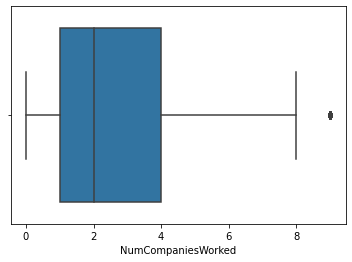

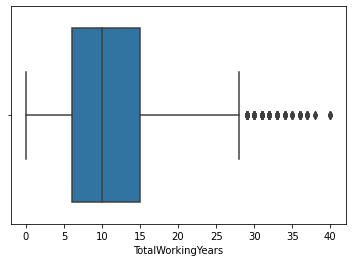

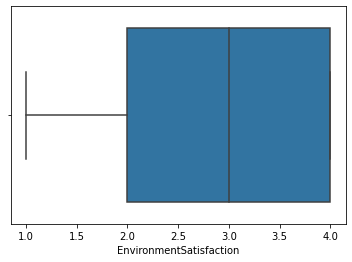

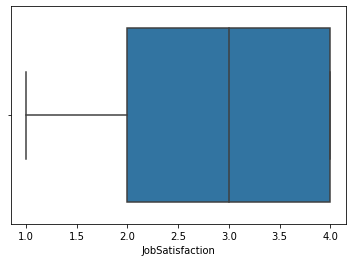

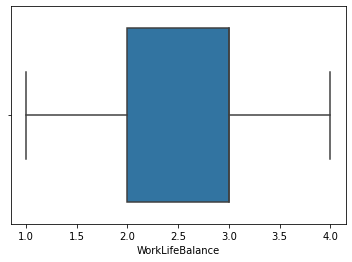

In [263]:
cols = ['NumCompaniesWorked','TotalWorkingYears', 'EnvironmentSatisfaction','JobSatisfaction', 'WorkLifeBalance']
for i in cols:
    sns.boxplot(x = i, data = full_data)
    plt.show()

In [ ]:

for col in df_cat.drop(columns=['country', 'agent', 'company', 'reservation_status_date']):
    plt.figure(figsize = (15,6))
    ax = sns.countplot(x = col, data = df, hue = 'is_canceled')
     
    total = len(df[col])
    for val in ax.patches:
        pct = '{:.1f}%'.format(100 * val.get_height()/total)
        xpos = val.get_x() + 0.14
        ypos = val.get_height()
        ax.annotate(pct, (xpos, ypos), fontsize = 13)
        
    plt.xlabel(col, fontsize = 20)    
    plt.show()
    
    #for displaying barplot with labels

In [266]:
full_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [269]:
full_data.describe().columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [319]:
full_data[['Education',
           'EmployeeCount',
           'EmployeeID',
           'JobLevel',
           'StockOptionLevel','EnvironmentSatisfaction',
           'JobSatisfaction',
           'WorkLifeBalance',
           'JobInvolvement',
           'PerformanceRating']] = full_data[['Education',
                                              'EmployeeCount',
                                              'EmployeeID',
                                              'JobLevel',
                                              'StockOptionLevel','EnvironmentSatisfaction',
                                              'JobSatisfaction',
                                              'WorkLifeBalance',
                                              'JobInvolvement',
                                              'PerformanceRating']].astype('object')
full_data[['Age']]= full_data[['Age']].astype('int64')

In [320]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null object
EducationField             4410 non-null object
EmployeeCount              4410 non-null object
EmployeeID                 4410 non-null object
Gender                     4410 non-null object
JobLevel                   4410 non-null object
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 n

In [300]:
full_data['StockOptionLevel'].describe()

count    4410.000000
mean        0.793878
std         0.851883
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64

In [310]:
Q1 = full_data[i].describe()['25%']
Q2 = full_data[i].describe()['50%']
Q3 = full_data[i].describe()['75%']

IQR = (Q3 - Q1) * 1.5
batas_bawah= Q1 - IQR
batas_atas = Q3 + IQR

def find_outlier(yourlist):
    outlier = ''
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier += str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier += str(yourlist[i]) + ', '
    return outlier

KeyError: '25%'

In [322]:
full_data['Age'].describe()['25%']

30.0

In [323]:
full_data.columns.to_series().groupby(gen_data.dtypes).groups

SyntaxError: keyword can't be an expression (<ipython-input-323-bb126789d052>, line 1)

In [271]:
for i in full_data.describe().columns:
    if find_outlier(full_data[i].values) == []:
        print('Feature {} has NO Outliers'.format(i))
    else:
        print('Feature {} has {} Outliers '.format(i, len((find_outlier(full_data[i].values)).split(','))))

Feature Age has 4411 Outliers 
Feature DistanceFromHome has 2710 Outliers 
Feature Education has 145 Outliers 
Feature EmployeeCount has 1 Outliers 
Feature EmployeeID has 4407 Outliers 
Feature JobLevel has 208 Outliers 
Feature MonthlyIncome has 4411 Outliers 
Feature NumCompaniesWorked has 1507 Outliers 
Feature PercentSalaryHike has 4411 Outliers 
Feature StandardHours has 4411 Outliers 
Feature StockOptionLevel has 1894 Outliers 
Feature TotalWorkingYears has 3752 Outliers 
Feature TrainingTimesLastYear has 715 Outliers 
Feature YearsAtCompany has 2803 Outliers 
Feature YearsSinceLastPromotion has 2524 Outliers 
Feature YearsWithCurrManager has 2431 Outliers 
Feature EnvironmentSatisfaction has 1 Outliers 
Feature JobSatisfaction has 1 Outliers 
Feature WorkLifeBalance has 1 Outliers 
Feature JobInvolvement has 1 Outliers 
Feature PerformanceRating has 1 Outliers 


In [290]:
full_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

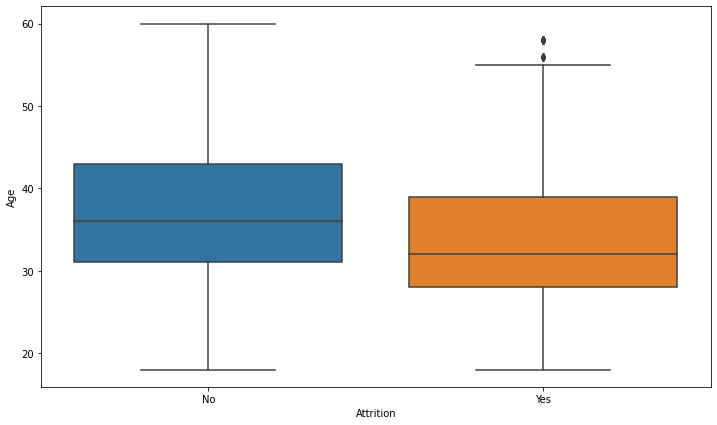

In [325]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Age',x='Attrition',data=full_data)

In [273]:
full_data['EmployeeCount'].nunique()

1

## 2.A. Feature Testing

The following test is to determine whether a feature is important or not. This test is done manually

In [37]:
print(gen_data['Over18'].unique())
print(gen_data['Over18'].nunique())

['Y']
1


The above test means that in this particular company (X,Y,Z), it can be certain that there were no employee below 18 years old as it would breach local laws regarding minimum age of employment. This feature can be dropped for later analysis

### 2.A.1. Countplot for 'Gender'

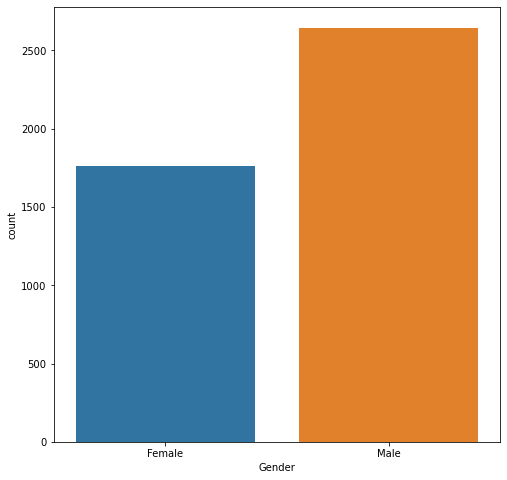

Male      2646
Female    1764
Name: Gender, dtype: int64

In [52]:
import seaborn as sns

plt.figure(figsize= (8,8))
sns.countplot(x = 'Gender', data = gen_data)
plt.show()
gen_data['Gender'].value_counts()

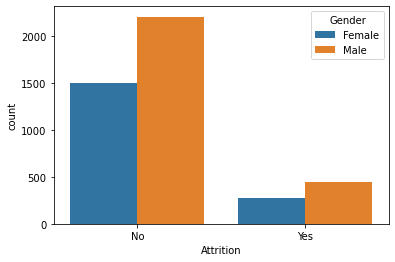

No     3699
Yes     711
Name: Attrition, dtype: int64

In [54]:
sns.countplot(x = 'Attrition',data = gen_data, hue='Gender')
plt.show()
gen_data['Attrition'].value_counts()

For each gender category, male is still the highest for both 'yes' and 'no' Attrition compared to Female counterparts.

In [59]:
print(gen_data['StandardHours'].unique()) #unique values
print(gen_data['StandardHours'].nunique()) # number of unique values

[8]
1


This feature 'StandardHours' is to show the number of working hours for 4410 Employees. Employees working in XYZ company all work 8 hours. This feature can be dropped for later analysis

In [60]:
print(gen_data['EmployeeCount'].unique()) #unique values
print(gen_data['EmployeeCount'].nunique()) # number of unique values

[1]
1


This feature 'EmployeeCount' is used to count how many employees are there in XYZ company. This too can be dropped for later analysis

In [71]:
print(gen_data['StockOptionLevel'].sort_values().unique()) #sort numerical values of their unique values
print(gen_data['StockOptionLevel'].nunique()) # number of unique values

[0 1 2 3]
4


In [76]:
gen_data[gen_data['StockOptionLevel']==3]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
16,21,No,Travel_Rarely,Research & Development,3,2,Life Sciences,1,17,Male,...,1.0,Y,12,8,3,3.0,3,3,1,0
63,31,No,Travel_Rarely,Sales,24,3,Life Sciences,1,64,Male,...,4.0,Y,11,8,3,13.0,4,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,58,No,Travel_Rarely,Sales,3,3,Marketing,1,4310,Female,...,4.0,Y,11,8,3,9.0,4,1,0,0
4328,33,No,Travel_Rarely,Research & Development,2,2,Medical,1,4329,Male,...,0.0,Y,18,8,3,4.0,4,3,0,2
4337,33,No,Travel_Rarely,Research & Development,4,3,Life Sciences,1,4338,Male,...,1.0,Y,11,8,3,8.0,6,8,1,6
4379,29,No,Travel_Frequently,Sales,15,4,Medical,1,4380,Female,...,1.0,Y,19,8,3,11.0,4,11,4,1


In [82]:
gen_data['StockOptionLevel'].value_counts()

0    1893
1    1788
2     474
3     255
Name: StockOptionLevel, dtype: int64

In [88]:
# df_HR.columns.to_series().groupby(df_HR.dtypes).groups
gen_data.columns.to_series().groupby(gen_data.dtypes).groups

{dtype('int64'): Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
        'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StandardHours',
        'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('float64'): Index(['NumCompaniesWorked', 'TotalWorkingYears'], dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18'],
       dtype='object')}

In [92]:
in_time_data = pd.read_csv('A:\Purwadhika\Jupyter\Final Project\Dataset\in_time.csv')
in_time_data

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaN,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,NaN,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaN,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaN,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,NaN,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,NaN,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [98]:
out_time_data = pd.read_csv('A:\Purwadhika\Jupyter\Final Project\Dataset\out_time.csv')
out_time_data.iloc[0:1,:]

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33


In [102]:
in_time_data_tr.fillna(value = 0,inplace = True)

In [104]:
in_time_data_tr['WeekdayName'] = in_time_data_tr.index

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, Unnamed: 0 to 2015-12-31
Columns: 4410 entries, 0 to 4409
dtypes: object(4410)
memory usage: 8.8+ MB


In [105]:
in_time_data_tr.index

Index(['Unnamed: 0', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
       ...
       '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
       '2015-12-25', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=262)

In [121]:
# in_time_data = pd.read_csv('A:\Purwadhika\Jupyter\Final Project\Dataset\in_time.csv', index_col=0, parse_dates=True)
in_time_data = pd.read_csv('A:\Purwadhika\Jupyter\Final Project\Dataset\in_time.csv')

In [122]:
in_time_data.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [123]:
in_time_data_tr = in_time_data.transpose()

In [124]:
in_time_data_tr

,0,1,2,3,4,5,6,7,8,9,...,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409
Unnamed: 0,1,2,3,4,5,6,7,8,9,10,...,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02 09:43:45,2015-01-02 10:15:44,2015-01-02 10:17:41,2015-01-02 10:05:06,2015-01-02 10:28:17,2015-01-02 09:43:08,2015-01-02 10:20:13,2015-01-02 09:57:10,NaN,2015-01-02 09:55:53,...,2015-01-02 09:42:53,2015-01-02 10:19:31,2015-01-02 10:00:39,2015-01-02 10:03:28,2015-01-02 10:18:28,2015-01-02 09:20:32,2015-01-02 10:03:41,2015-01-02 10:01:01,2015-01-02 10:17:05,2015-01-02 09:59:09
2015-01-05,2015-01-05 10:08:48,2015-01-05 10:21:05,2015-01-05 09:50:50,2015-01-05 09:56:32,2015-01-05 09:49:58,2015-01-05 10:14:00,2015-01-05 09:30:01,2015-01-05 09:48:56,2015-01-05 10:01:42,2015-01-05 10:21:06,...,2015-01-05 09:29:53,2015-01-05 10:02:53,2015-01-05 09:48:34,2015-01-05 10:12:53,2015-01-05 09:42:42,2015-01-05 10:17:53,NaN,2015-01-05 09:33:00,2015-01-05 10:02:27,2015-01-05 10:16:14
2015-01-06,2015-01-06 09:54:26,NaN,2015-01-06 10:14:13,2015-01-06 10:11:07,2015-01-06 09:45:28,2015-01-06 10:08:42,2015-01-06 09:48:47,2015-01-06 09:54:04,2015-01-06 09:50:56,2015-01-06 10:03:01,...,2015-01-06 09:35:10,2015-01-06 09:38:17,2015-01-06 09:42:54,2015-01-06 09:45:49,2015-01-06 10:08:36,2015-01-06 10:26:51,2015-01-06 09:44:00,2015-01-06 09:49:17,2015-01-06 10:12:50,2015-01-06 09:52:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-28,2015-12-28 10:13:41,2015-12-28 09:31:45,2015-12-28 09:42:05,2015-12-28 09:52:44,2015-12-28 10:05:15,NaN,2015-12-28 10:19:47,2015-12-28 09:59:24,NaN,2015-12-28 10:20:31,...,2015-12-28 09:50:17,2015-12-28 10:15:17,2015-12-28 10:11:33,2015-12-28 10:18:13,2015-12-28 10:07:07,2015-12-28 10:15:39,2015-12-28 09:54:23,2015-12-28 09:59:24,2015-12-28 09:55:25,2015-12-28 09:41:11
2015-12-29,2015-12-29 10:03:36,2015-12-29 09:55:49,2015-12-29 09:43:36,2015-12-29 09:33:16,2015-12-29 10:30:53,2015-12-29 09:51:47,2015-12-29 09:44:16,2015-12-29 09:54:34,2015-12-29 10:06:27,2015-12-29 10:12:14,...,2015-12-29 10:09:06,2015-12-29 10:03:38,2015-12-29 09:54:20,2015-12-29 09:44:52,2015-12-29 09:57:23,2015-12-29 10:10:09,2015-12-29 10:13:32,NaN,2015-12-29 09:54:42,2015-12-29 10:05:15
2015-12-30,2015-12-30 09:54:12,2015-12-30 10:32:25,2015-12-30 09:34:05,2015-12-30 10:18:12,2015-12-30 09:18:21,2015-12-30 10:20:39,2015-12-30 10:05:48,2015-12-30 09:43:37,2015-12-30 10:17:59,2015-12-30 10:08:04,...,2015-12-30 10:10:06,2015-12-30 10:02:35,2015-12-30 09:48:16,2015-12-30 09:56:32,2015-12-30 09:23:37,2015-12-30 09:28:19,2015-12-30 10:21:09,2015-12-30 10:02:36,2015-12-30 10:15:44,2015-12-30 10:32:49


In [137]:
import matplotlib.dates as mdates
idx = pd.date_range(start='2015-01-01',end = '2015-12-31', freq='D').to_series()
# s = pd.date_range('2018-12-31', '2019-01-08', freq='D').to_series()
# s.dt.dayofweek

In [138]:
# in_time_data_tr['WeekDay'] = in_time_data_tr.idx.day_name
idx.dt.dayofweek

2015-01-01    3
2015-01-02    4
2015-01-03    5
2015-01-04    6
2015-01-05    0
             ..
2015-12-27    6
2015-12-28    0
2015-12-29    1
2015-12-30    2
2015-12-31    3
Freq: D, Length: 365, dtype: int64

In [139]:
in_time_data_tr['Weekday Name'] = idx.dt.dayofweek

In [143]:
in_time_data_tr.drop(['Weekday Name'], axis = 1)

,0,1,2,3,4,5,6,7,8,9,...,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409
Unnamed: 0,1,2,3,4,5,6,7,8,9,10,...,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02 09:43:45,2015-01-02 10:15:44,2015-01-02 10:17:41,2015-01-02 10:05:06,2015-01-02 10:28:17,2015-01-02 09:43:08,2015-01-02 10:20:13,2015-01-02 09:57:10,NaN,2015-01-02 09:55:53,...,2015-01-02 09:42:53,2015-01-02 10:19:31,2015-01-02 10:00:39,2015-01-02 10:03:28,2015-01-02 10:18:28,2015-01-02 09:20:32,2015-01-02 10:03:41,2015-01-02 10:01:01,2015-01-02 10:17:05,2015-01-02 09:59:09
2015-01-05,2015-01-05 10:08:48,2015-01-05 10:21:05,2015-01-05 09:50:50,2015-01-05 09:56:32,2015-01-05 09:49:58,2015-01-05 10:14:00,2015-01-05 09:30:01,2015-01-05 09:48:56,2015-01-05 10:01:42,2015-01-05 10:21:06,...,2015-01-05 09:29:53,2015-01-05 10:02:53,2015-01-05 09:48:34,2015-01-05 10:12:53,2015-01-05 09:42:42,2015-01-05 10:17:53,NaN,2015-01-05 09:33:00,2015-01-05 10:02:27,2015-01-05 10:16:14
2015-01-06,2015-01-06 09:54:26,NaN,2015-01-06 10:14:13,2015-01-06 10:11:07,2015-01-06 09:45:28,2015-01-06 10:08:42,2015-01-06 09:48:47,2015-01-06 09:54:04,2015-01-06 09:50:56,2015-01-06 10:03:01,...,2015-01-06 09:35:10,2015-01-06 09:38:17,2015-01-06 09:42:54,2015-01-06 09:45:49,2015-01-06 10:08:36,2015-01-06 10:26:51,2015-01-06 09:44:00,2015-01-06 09:49:17,2015-01-06 10:12:50,2015-01-06 09:52:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-28,2015-12-28 10:13:41,2015-12-28 09:31:45,2015-12-28 09:42:05,2015-12-28 09:52:44,2015-12-28 10:05:15,NaN,2015-12-28 10:19:47,2015-12-28 09:59:24,NaN,2015-12-28 10:20:31,...,2015-12-28 09:50:17,2015-12-28 10:15:17,2015-12-28 10:11:33,2015-12-28 10:18:13,2015-12-28 10:07:07,2015-12-28 10:15:39,2015-12-28 09:54:23,2015-12-28 09:59:24,2015-12-28 09:55:25,2015-12-28 09:41:11
2015-12-29,2015-12-29 10:03:36,2015-12-29 09:55:49,2015-12-29 09:43:36,2015-12-29 09:33:16,2015-12-29 10:30:53,2015-12-29 09:51:47,2015-12-29 09:44:16,2015-12-29 09:54:34,2015-12-29 10:06:27,2015-12-29 10:12:14,...,2015-12-29 10:09:06,2015-12-29 10:03:38,2015-12-29 09:54:20,2015-12-29 09:44:52,2015-12-29 09:57:23,2015-12-29 10:10:09,2015-12-29 10:13:32,NaN,2015-12-29 09:54:42,2015-12-29 10:05:15
2015-12-30,2015-12-30 09:54:12,2015-12-30 10:32:25,2015-12-30 09:34:05,2015-12-30 10:18:12,2015-12-30 09:18:21,2015-12-30 10:20:39,2015-12-30 10:05:48,2015-12-30 09:43:37,2015-12-30 10:17:59,2015-12-30 10:08:04,...,2015-12-30 10:10:06,2015-12-30 10:02:35,2015-12-30 09:48:16,2015-12-30 09:56:32,2015-12-30 09:23:37,2015-12-30 09:28:19,2015-12-30 10:21:09,2015-12-30 10:02:36,2015-12-30 10:15:44,2015-12-30 10:32:49


In [115]:
in_time_data_tr.index

Index(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
       '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
       ...
       '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
       '2015-12-25', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=261)

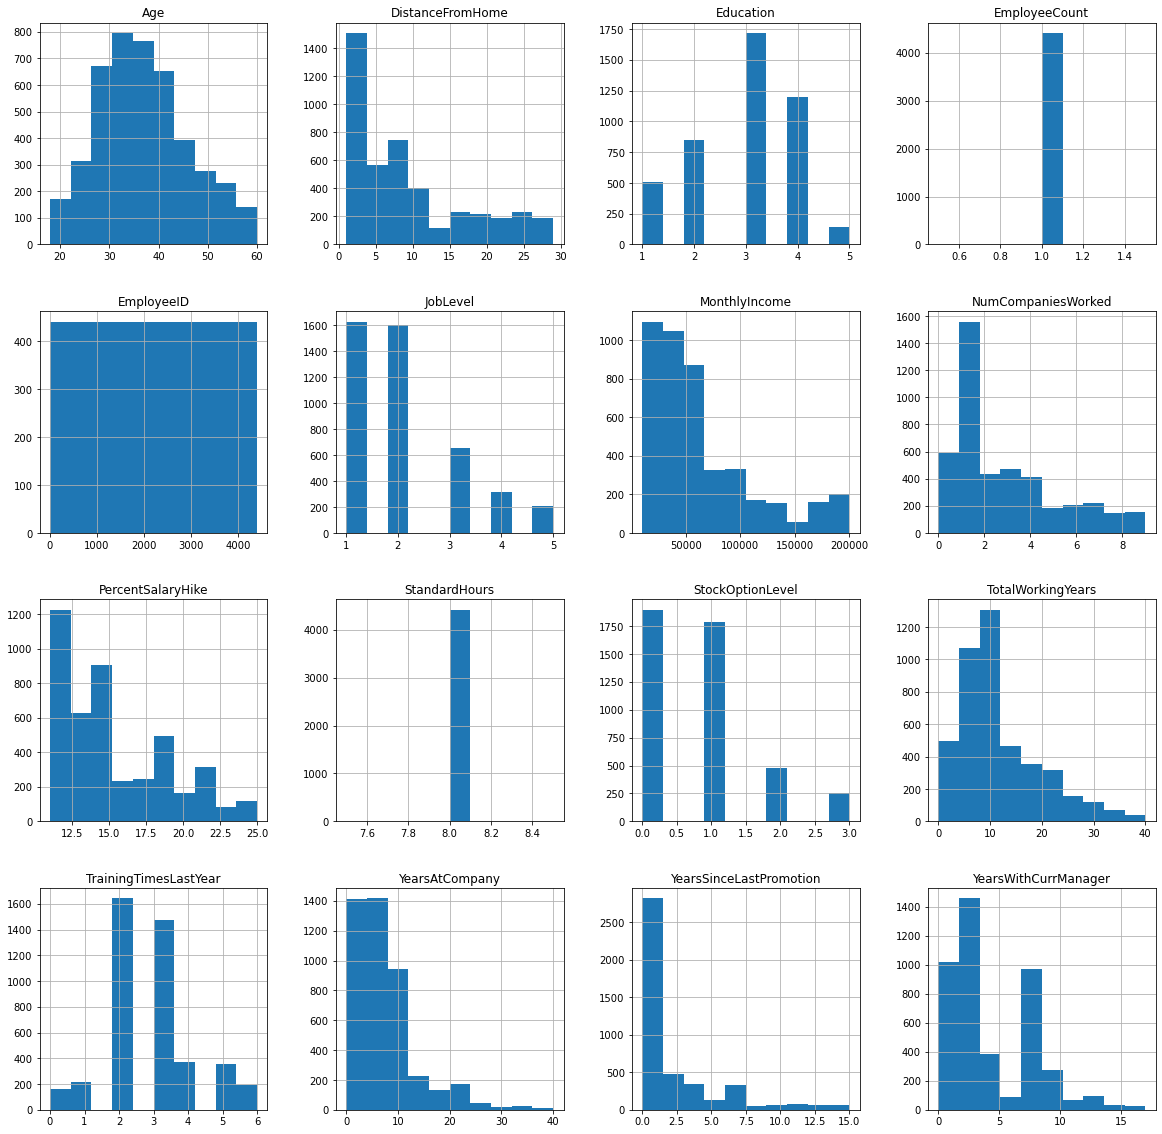

Wall time: 2.06 s


In [152]:
%%time
gen_data.hist(figsize=(20,20))
plt.show()

C:\Users\Azizur Rachman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Azizur Rachman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


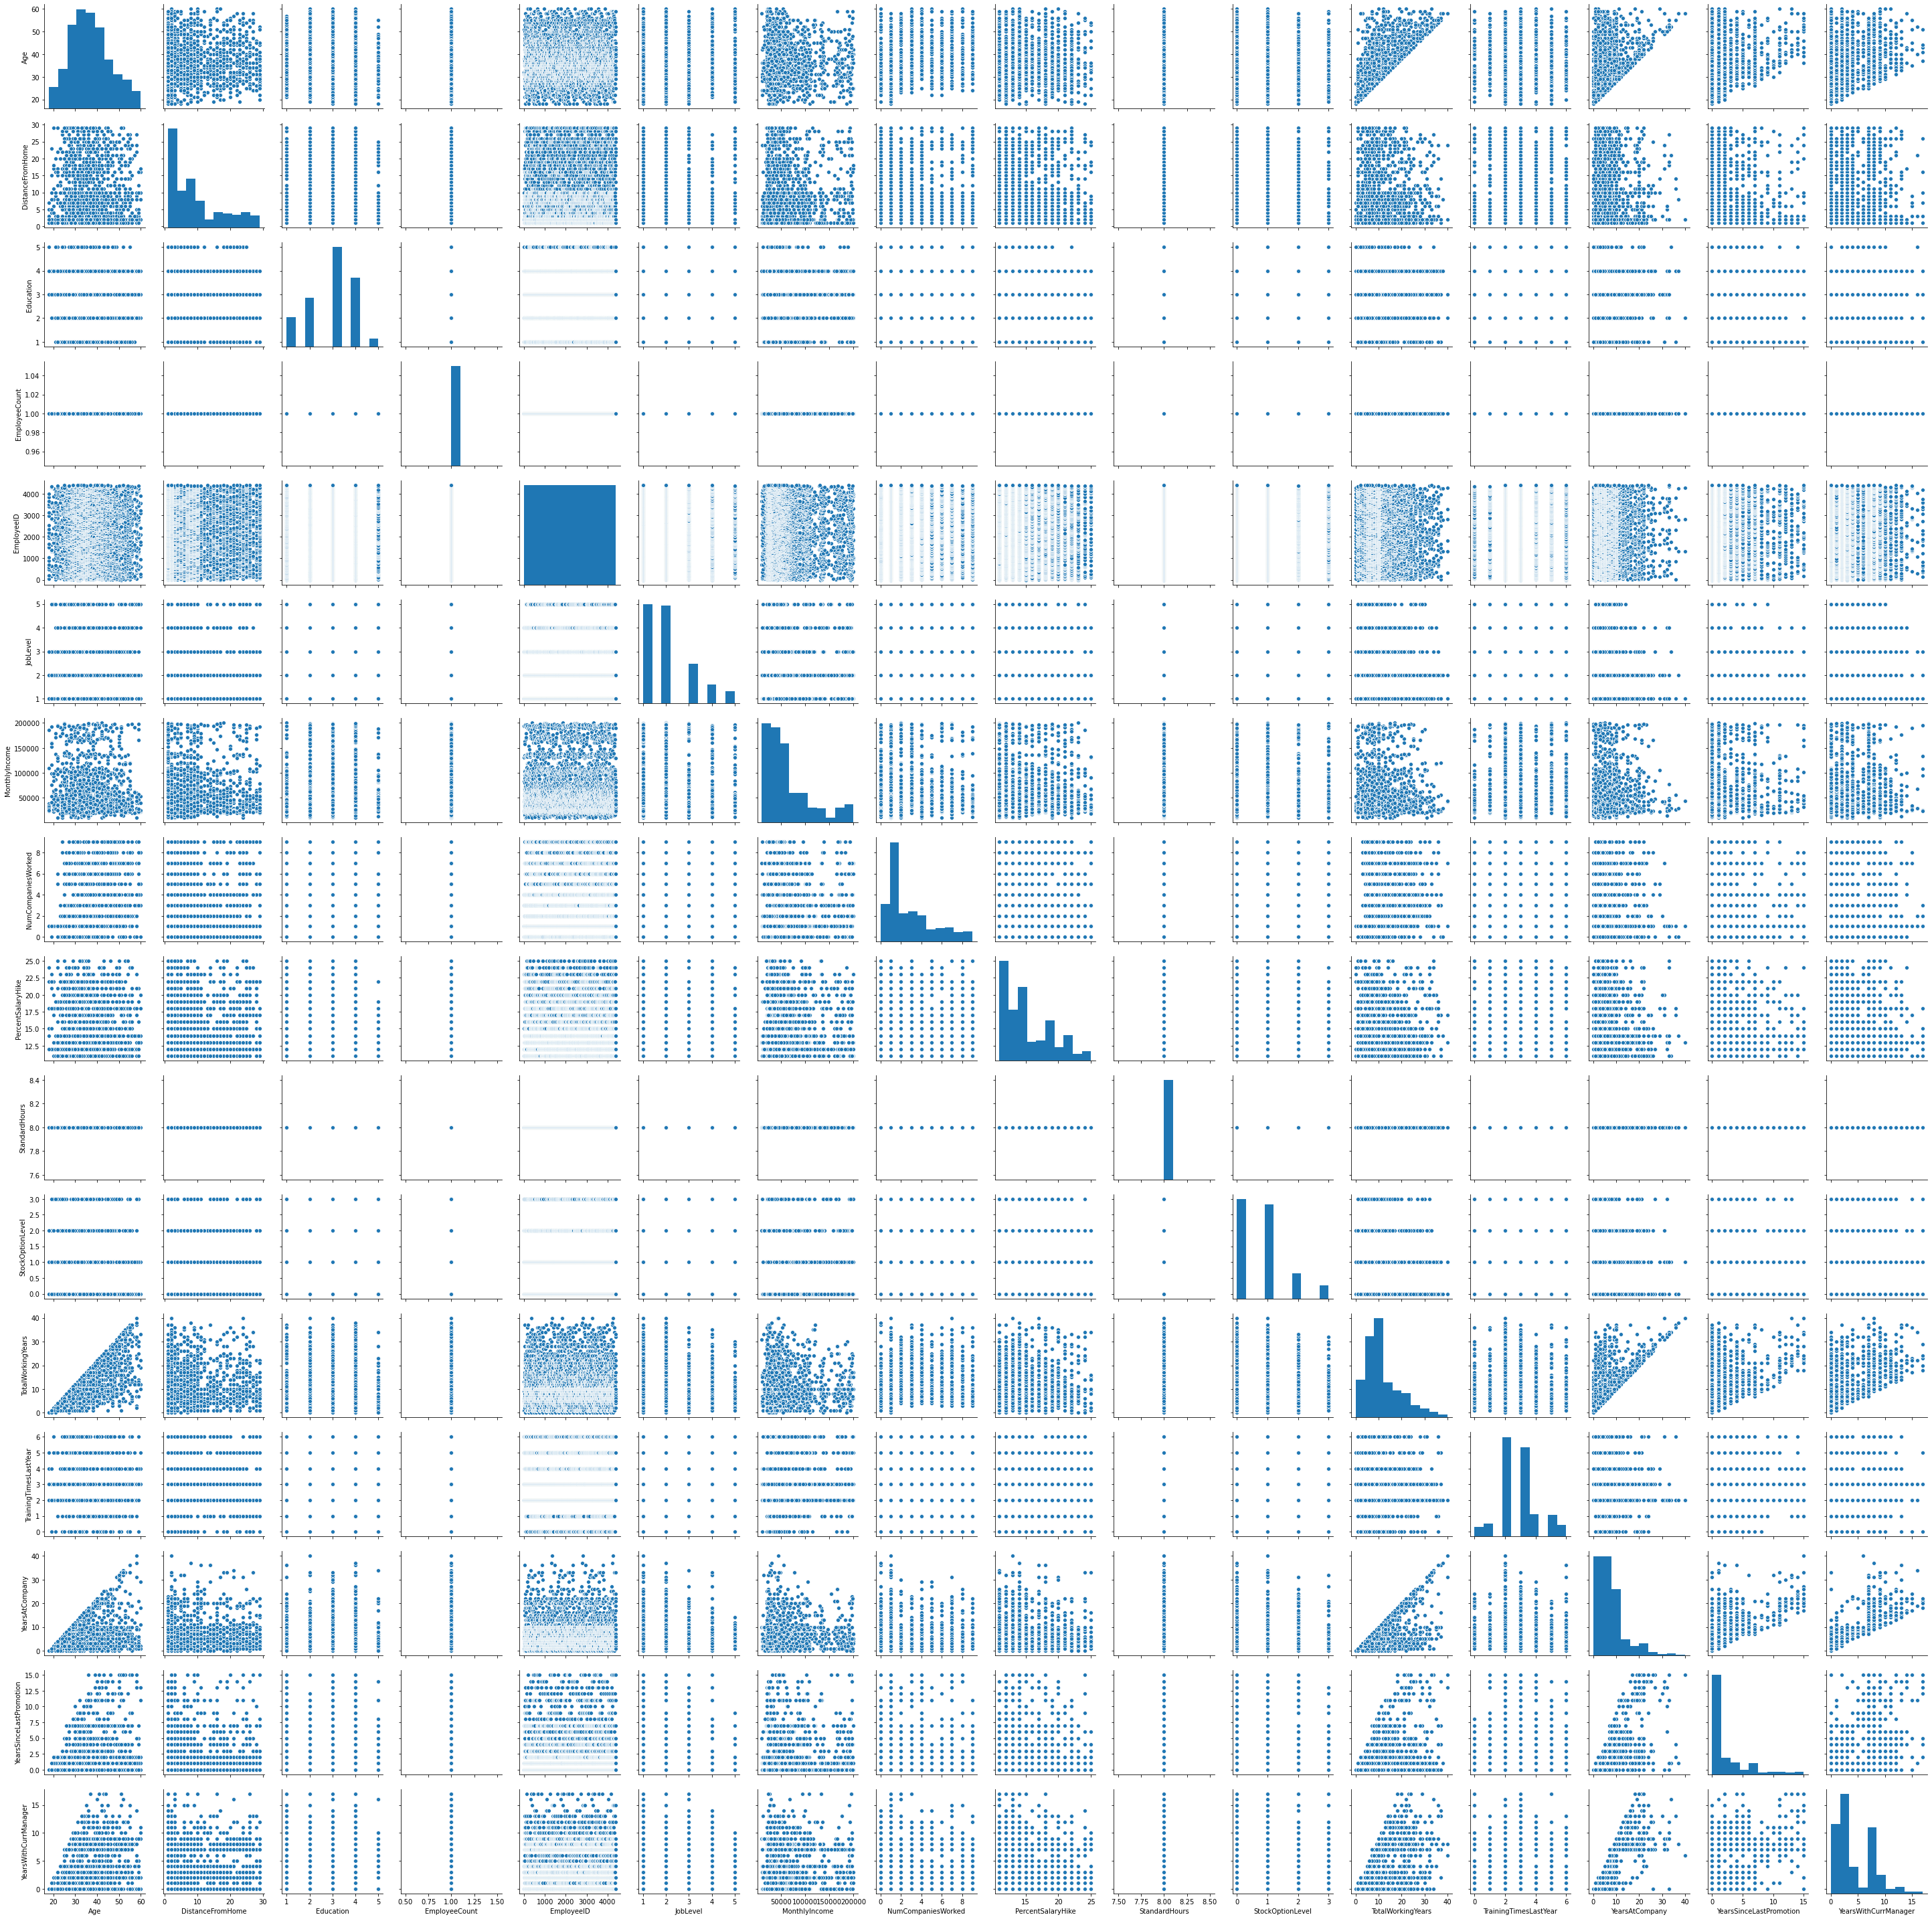

In [150]:
graph_pairplot_sns = sns.pairplot(gen_data)
graph_pairplot_sns 

In [238]:
pwd

'A:\\Purwadhika\\Jupyter\\Final Project'

In [378]:
full_data['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=object)

# Convert to CSV Clean

In [376]:
full_data.to_csv('full_data_clean.csv', index = False) #Cleaned Data

# To do list
1. New Notebook clean data, make a list of categorical data and numerical data
2. Encode Categorical data
3. Scale the data (Normalizer?)
4. Feature Selection
5. Splitting data
6. Insert ML Algorithm
7. Paralel buat visualisasi

In [386]:
full_data['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64